In [1]:
from projects.NeuralForceField.train import *
from projects.NeuralForceField.graphs import * 
import numpy as np

from sklearn.utils import shuffle
from projects.graphbuilder.graphbuilder import Graph, GraphDataset

In [7]:
# ethanol data 
train = np.load('/home/wwj/data/ethanol_ccsd_t-train.npz')
xyz_data = np.dstack((np.array([train.f.z]*1000).reshape(1000, -1, 1), np.array(train.f.R)))
force_data = train.f.F
energy_data = train.f.E.squeeze()

In [10]:
graph_data = load_graph_data(xyz_data=xyz_data, energy_data=energy_data, batch_size=100, cutoff=5.0,
                             force_data=force_data, au_flag=False, subtract_mean_flag = True)

In [4]:
# initialize parameters
par = dict()

par["n_filters"] = 256
par["n_gaussians"] = 32
par["n_atom_basis"] = 256
par["optim"] = 1e-4
par["scheduler"] = True
par["train_percentage"] = 0.8
par["T"] = 10
par["batch_size"] = 100
par["cutoff"] = 5.0 
par["max_epoch"] = 10
par["trainable_gauss"] = True
par["rho"] = 0.1
par["eps"] = 1e-1

In [11]:
model = Model(par=par, graph_data=graph_data, device=3, job_name="test", graph_batching=True, root='./log/')

In [12]:
model.train(20)

/home/wwj/Repo/projects/NeuralForceField/train.py:183: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_u = train_u_mae.data[0]/self.N_train
/home/wwj/Repo/projects/NeuralForceField/train.py:184: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_force = train_force_mae.data[0]/self.N_train


epoch 0  U train: 4.252  force train 18.457
epoch 1  U train: 3.433  force train 13.850
epoch 2  U train: 2.532  force train 10.321
epoch 3  U train: 2.850  force train 8.468
epoch 4  U train: 2.460  force train 6.888
epoch 5  U train: 2.744  force train 6.059
epoch 6  U train: 2.800  force train 5.403
epoch 7  U train: 2.385  force train 4.923
epoch 8  U train: 2.029  force train 4.575
epoch 9  U train: 2.102  force train 4.314
max epoches reached


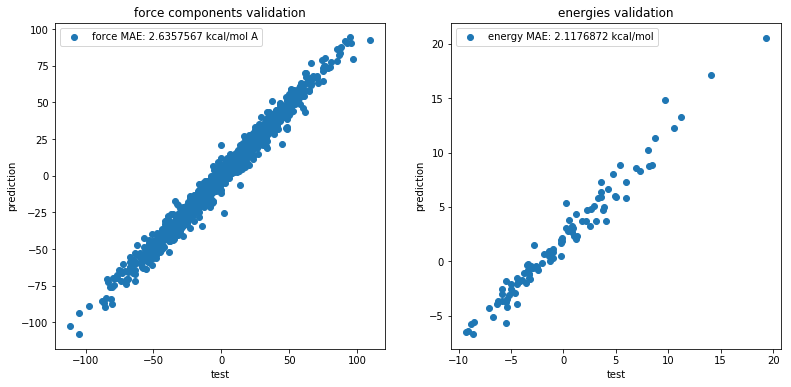

In [8]:
model.validate()

In [12]:
energy

array(-4.43441289)

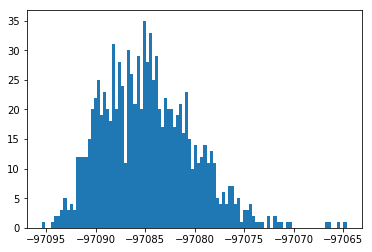

In [13]:
plt.hist(train.f.E, bins = 100)
plt.show()